In [1]:
from py_geohash_any import geohash as gh
import pandas as pd
import matplotlib.pyplot as plt

#### Importar datos de establecimientos que ya tienen geohash

In [2]:
df_establecimientos = pd.read_csv('../../../Data/EE_2019_CL_geohash.csv')

In [3]:
df_establecimientos.head(2)

,row_number,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,...,ENS_11,MATRICULA,ESTADO_ESTAB,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL,lat,long,geohash
0,0,2019,1,9,LICEO POLITECNICO ARICA,,69010100,1,15,AYP,...,0,1,1,2,,GRATUITO,GRATUITO,-18.487274,-70.294739,6kwnb6k
1,1,2019,2,7,PARVULARIO LAS ESPIGUITAS,,69010100,1,15,AYP,...,0,1,1,2,,GRATUITO,GRATUITO,-18.469862,-70.302757,6kwnbjx


Eliminar columnas que no sean necesarias (Depende de cada país)

In [4]:
df_establecimientos = df_establecimientos.drop(columns=['AGNO', 
                                                        'DGV_RBD',
                                                        'MRUN', 
                                                        'RUT_SOSTENEDOR',
                                                        'P_JURIDICA', 
                                                        'NOM_REG_RBD_A', 
                                                        'COD_PRO_RBD', 
                                                        'COD_DEPROV_RBD',
                                                        'NOM_DEPROV_RBD', 
                                                        'COD_DEPE', 
                                                        'COD_DEPE2',])

#### Cambiar nombre de columnas según pais

In [5]:
COD_ESCUELA_PAIS = 'RBD'
COD_ADM3 = 'COD_COM_RBD'
NOM_ADM3= 'NOM_COM_RBD'
COD_ADM1 = 'COD_REG_RBD'

In [6]:
df_establecimientos = df_establecimientos.rename(columns= {
    COD_ESCUELA_PAIS : 'COD_ESCUELA_PAIS',
    COD_ADM3 : 'COD_ADM3',
    NOM_ADM3 : 'NOM_ADM3',
    COD_ADM1 : 'COD_ADM1'
})

In [7]:
df_establecimientos.COD_ESCUELA_PAIS.nunique()

12937

In [8]:
geohash_escuelas = df_establecimientos.geohash.values
geohash_neighbors = []
geohash_reference = []
for reference, neighbours in map(lambda x: (x,gh.neighbors(x).values()), geohash_escuelas):
    for e in neighbours:
        geohash_neighbors.append(e)
        geohash_reference.append(reference)

In [9]:
len(geohash_neighbors)

103496

In [10]:
df_neighbors = pd.DataFrame({'geohash':geohash_neighbors,'geohash_reference':geohash_reference})

In [40]:
df_neighbors.head()

,geohash,geohash_reference
0,6kwnb6O,6kwnb6k
1,6kwnb6P,6kwnb6k
2,6kwnb6l,6kwnb6k
3,6kwnb6n,6kwnb6k
4,6kwnb6m,6kwnb6k


#### Importar datos de geohash, cambiar para cada país

In [11]:
df = pd.read_csv('../../../Data/Geohashes/Chile.zip')
df.head()

,Unnamed: 0,geohash,g_adm_1,g_adm_3,month,day,n_visitantes_geohash,n_visitantes_adm3,n_visitantes_0,n_visitantes_1,...,n_visitantes_14,n_visitantes_15,n_visitantes_16,n_visitantes_17,n_visitantes_18,n_visitantes_19,n_visitantes_20,n_visitantes_21,n_visitantes_22,n_visitantes_23
0,0,66jt91k,5.0,5702.0,5,3,4,2,0,0,...,1,1,0,1,0,0,0,1,0,0
1,1,63knfd2,8.0,8107.0,3,16,15,11,1,0,...,3,4,1,1,2,2,0,1,1,0
2,2,637uz4p,8.0,8106.0,3,16,3,3,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,66jec5e,13.0,13303.0,5,6,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,66jcejx,13.0,13113.0,3,10,5,4,0,0,...,0,1,1,0,0,0,0,0,0,0


In [12]:
df.shape

(19166083, 32)

#### Eliminar columna de indice

In [13]:
df = df.drop(columns=['Unnamed: 0'])

In [14]:
df.shape

(19166083, 31)

Filtro por mes

In [15]:
df = df[df.month==3]
print(df.shape)

(6751775, 31)


#### Acá hay que verificar que pasa con los establecimientos. 
- Cuántos establecimientos que no tienen info?
- De qué comunas?

Merge geohash escuelas con visitas a geohash

In [41]:
df.shape

(6751775, 31)

In [16]:
df_merge_establecimientos = df_establecimientos.merge(df,how='left',on='geohash',indicator=True)

In [43]:
df_establecimientos.shape

(12937, 28)

In [17]:
df_merge_establecimientos.shape

(271516, 59)

In [46]:
271516/12937

20.987555074592255

Merge geohash vecinos con visitas a geohash

In [48]:
df.shape

(6751775, 31)

In [18]:
df_merge_vecinos = df_neighbors.merge(df,how='left',on='geohash',indicator=True)

In [44]:
df_neighbors.shape

(103496, 2)

In [19]:
df_merge_vecinos.shape

(1372863, 33)

In [50]:
df_merge_vecinos.head()

,geohash,geohash_reference,g_adm_1,g_adm_3,month,day,n_visitantes_geohash,n_visitantes_adm3,n_visitantes_0,n_visitantes_1,...,n_visitantes_15,n_visitantes_16,n_visitantes_17,n_visitantes_18,n_visitantes_19,n_visitantes_20,n_visitantes_21,n_visitantes_22,n_visitantes_23,_merge
0,6kwnb6O,6kwnb6k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,6kwnb6P,6kwnb6k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,6kwnb6l,6kwnb6k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,6kwnb6n,6kwnb6k,15.0,15101.0,3.0,8.0,4.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,both
4,6kwnb6n,6kwnb6k,15.0,15101.0,3.0,18.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,both


- imputar con 0

## Agrupar geohash por geohash de referencia

In [20]:
df_merge_vecinos.columns

Index(['geohash', 'geohash_reference', 'g_adm_1', 'g_adm_3', 'month', 'day',
       'n_visitantes_geohash', 'n_visitantes_adm3', 'n_visitantes_0',
       'n_visitantes_1', 'n_visitantes_2', 'n_visitantes_3', 'n_visitantes_4',
       'n_visitantes_5', 'n_visitantes_6', 'n_visitantes_7', 'n_visitantes_8',
       'n_visitantes_9', 'n_visitantes_10', 'n_visitantes_11',
       'n_visitantes_12', 'n_visitantes_13', 'n_visitantes_14',
       'n_visitantes_15', 'n_visitantes_16', 'n_visitantes_17',
       'n_visitantes_18', 'n_visitantes_19', 'n_visitantes_20',
       'n_visitantes_21', 'n_visitantes_22', 'n_visitantes_23', '_merge'],
      dtype='object')

In [21]:
df_merge_vecinos_agg = df_merge_vecinos.groupby(['geohash_reference','month','day']).agg(['sum','mean','max','std'])

In [22]:
df_merge_vecinos_agg.columns = ["_".join(x) for x in df_merge_vecinos_agg.columns.ravel()]

In [23]:
df_merge_vecinos_agg = df_merge_vecinos_agg.reset_index()
df_merge_vecinos_agg.head()

,geohash_reference,month,day,g_adm_1_sum,g_adm_1_mean,g_adm_1_max,g_adm_1_std,g_adm_3_sum,g_adm_3_mean,g_adm_3_max,...,n_visitantes_21_max,n_visitantes_21_std,n_visitantes_22_sum,n_visitantes_22_mean,n_visitantes_22_max,n_visitantes_22_std,n_visitantes_23_sum,n_visitantes_23_mean,n_visitantes_23_max,n_visitantes_23_std
0,3e4jtbu,3.0,1.0,15.0,5.0,5.0,0.0,15603.0,5201.0,5201.0,...,1.0,0.577350,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0
1,3e4jtbu,3.0,2.0,10.0,5.0,5.0,0.0,10402.0,5201.0,5201.0,...,0.0,0.000000,3.0,1.500000,2.0,0.707107,0.0,0.00,0.0,0.0
2,3e4jtbu,3.0,3.0,15.0,5.0,5.0,0.0,15603.0,5201.0,5201.0,...,1.0,0.577350,1.0,0.333333,1.0,0.577350,0.0,0.00,0.0,0.0
3,3e4jtbu,3.0,4.0,20.0,5.0,5.0,0.0,20804.0,5201.0,5201.0,...,1.0,0.500000,1.0,0.250000,1.0,0.500000,1.0,0.25,1.0,0.5
4,3e4jtbu,3.0,5.0,20.0,5.0,5.0,0.0,20804.0,5201.0,5201.0,...,2.0,0.957427,0.0,0.000000,0.0,0.000000,1.0,0.25,1.0,0.5


In [24]:
df_merge = df_merge_establecimientos.merge(df_merge_vecinos_agg, left_on=['geohash','month','day'], right_on=['geohash_reference','month','day'], suffixes=('','_vecinos'))

In [26]:
for x in df_merge.columns:
    print(x)

row_number
COD_ESCUELA_PAIS
NOM_RBD
COD_ADM1
COD_ADM3
NOM_ADM3
RURAL_RBD
CONVENIO_PIE
ENS_01
ENS_02
ENS_03
ENS_04
ENS_05
ENS_06
ENS_07
ENS_08
ENS_09
ENS_10
ENS_11
MATRICULA
ESTADO_ESTAB
ORI_RELIGIOSA
ORI_OTRO_GLOSA
PAGO_MATRICULA
PAGO_MENSUAL
lat
long
geohash
g_adm_1
g_adm_3
month
day
n_visitantes_geohash
n_visitantes_adm3
n_visitantes_0
n_visitantes_1
n_visitantes_2
n_visitantes_3
n_visitantes_4
n_visitantes_5
n_visitantes_6
n_visitantes_7
n_visitantes_8
n_visitantes_9
n_visitantes_10
n_visitantes_11
n_visitantes_12
n_visitantes_13
n_visitantes_14
n_visitantes_15
n_visitantes_16
n_visitantes_17
n_visitantes_18
n_visitantes_19
n_visitantes_20
n_visitantes_21
n_visitantes_22
n_visitantes_23
_merge
geohash_reference
g_adm_1_sum
g_adm_1_mean
g_adm_1_max
g_adm_1_std
g_adm_3_sum
g_adm_3_mean
g_adm_3_max
g_adm_3_std
n_visitantes_geohash_sum
n_visitantes_geohash_mean
n_visitantes_geohash_max
n_visitantes_geohash_std
n_visitantes_adm3_sum
n_visitantes_adm3_mean
n_visitantes_adm3_max
n_visitant

In [71]:
df_comparison = df_merge.groupby(['geohash','month','day','COD_ADM1','NOM_ADM3']).agg({'n_visitantes_geohash':'mean',
                                                                                       'n_visitantes_7':'mean',
                                                                                       'n_visitantes_8':'mean',
                                                                                       'n_visitantes_12':'mean',
                                                                                       'n_visitantes_14':'mean',
                                                                                       'n_visitantes_15':'mean',
                                                                                       'n_visitantes_geohash_mean':'mean',
                                                                                       'n_visitantes_7_mean':'mean',
                                                                                       'n_visitantes_8_mean':'mean',
                                                                                       'n_visitantes_12_mean':'mean',
                                                                                       'n_visitantes_14_mean':'mean',
                                                                                       'n_visitantes_15_mean':'mean'}).reset_index()

In [72]:
df_comparison

,geohash,month,day,COD_ADM1,NOM_ADM3,n_visitantes_geohash,n_visitantes_7,n_visitantes_8,n_visitantes_12,n_visitantes_14,n_visitantes_15,n_visitantes_geohash_mean,n_visitantes_7_mean,n_visitantes_8_mean,n_visitantes_12_mean,n_visitantes_14_mean,n_visitantes_15_mean
0,3e4jtbu,3.0,1.0,5,ISLA DE PASCUA,3.0,0.0,0.0,0.0,0.0,1.0,2.666667,0.333333,0.333333,0.000000,0.00,0.00
1,3e4jtbu,3.0,2.0,5,ISLA DE PASCUA,1.0,0.0,0.0,0.0,0.0,0.0,3.500000,0.000000,1.000000,1.000000,1.00,0.50
2,3e4jtbu,3.0,3.0,5,ISLA DE PASCUA,1.0,0.0,0.0,0.0,0.0,0.0,4.000000,0.000000,0.000000,0.333333,0.00,0.00
3,3e4jtbu,3.0,4.0,5,ISLA DE PASCUA,4.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.000000,0.000000,0.500000,0.00,0.25
4,3e4jtbu,3.0,5.0,5,ISLA DE PASCUA,1.0,0.0,0.0,0.0,0.0,0.0,3.500000,0.250000,0.000000,0.500000,0.75,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235456,6kyefuv,3.0,10.0,15,GENERAL LAGOS,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00
235457,6kyefuv,3.0,19.0,15,GENERAL LAGOS,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.00,0.00
235458,6kyefuv,3.0,20.0,15,GENERAL LAGOS,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00
235459,6kyefuv,3.0,21.0,15,GENERAL LAGOS,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00


Selección región metropolitana

In [73]:
rm = df_comparison[df_comparison.COD_ADM1==13]

In [74]:
rm_gb=rm.groupby(['COD_ADM1','month','day']).agg('mean').reset_index()

In [75]:
rm_gb

,COD_ADM1,month,day,n_visitantes_geohash,n_visitantes_7,n_visitantes_8,n_visitantes_12,n_visitantes_14,n_visitantes_15,n_visitantes_geohash_mean,n_visitantes_7_mean,n_visitantes_8_mean,n_visitantes_12_mean,n_visitantes_14_mean,n_visitantes_15_mean
0,13,3.0,1.0,18.733955,0.567946,0.727142,1.686267,1.770527,1.564360,17.241975,0.571339,0.710798,1.626526,1.716954,1.526938
1,13,3.0,2.0,33.545842,3.197939,3.508529,2.986851,2.711798,2.623667,29.889549,2.643748,2.911009,2.548759,2.387723,2.394813
2,13,3.0,3.0,33.970526,3.251776,3.524503,3.120384,2.785156,2.702415,30.354465,2.688425,2.947890,2.648425,2.525161,2.470097
3,13,3.0,4.0,36.917818,4.119377,4.575983,3.432873,3.062699,2.874956,32.183465,3.207484,3.438217,2.820658,2.626050,2.502028
4,13,3.0,5.0,36.561590,4.115371,4.159389,3.407526,3.082712,2.873624,31.973531,3.207558,3.344702,2.709785,2.606822,2.469046
5,13,3.0,6.0,38.485998,3.961716,4.082949,3.415101,3.230060,3.107054,33.513776,3.134576,3.241078,2.733215,2.830538,2.723125
6,13,3.0,7.0,27.747421,0.952686,1.282462,2.829242,2.652793,2.279616,25.197664,0.946765,1.246161,2.599059,2.473149,2.163695
7,13,3.0,8.0,21.064089,0.659864,0.826352,2.226638,2.098102,1.941998,19.340942,0.647244,0.812723,2.126655,2.025624,1.844107
8,13,3.0,9.0,35.329087,4.070064,4.208068,3.186129,3.007431,3.127742,30.849365,3.315873,3.390152,2.606866,2.518587,2.552135
9,13,3.0,10.0,36.759915,4.207507,4.278329,3.371813,3.150142,3.310552,32.013742,3.344836,3.446289,2.742704,2.616071,2.629335


In [76]:
plt.rcParams["figure.figsize"] = (14,6)

In [77]:
import numpy as np

Entre 7 y 8 am

<module 'matplotlib.pyplot' from 'C:\\Users\\catta\\Anaconda3\\envs\\geopython\\lib\\site-packages\\matplotlib\\pyplot.py'>

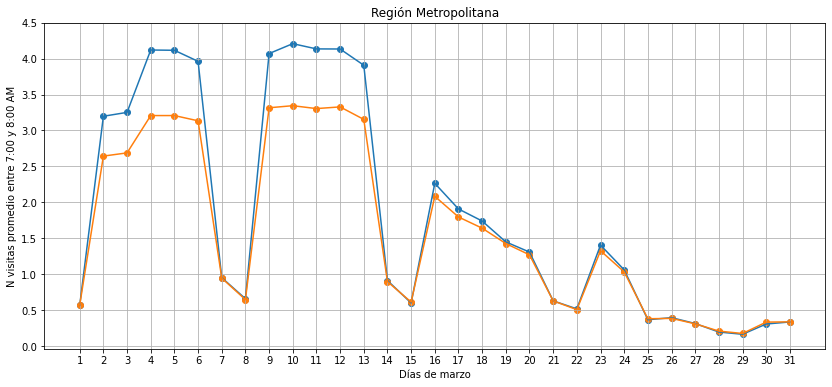

In [67]:
plt.plot(rm_gb.day,rm_gb.n_visitantes_7)
plt.scatter(rm_gb.day,rm_gb.n_visitantes_7)
plt.plot(rm_gb.day,rm_gb.n_visitantes_7_mean)
plt.scatter(rm_gb.day,rm_gb.n_visitantes_7_mean)
plt.xticks(rm_gb.day)
plt.yticks(np.arange(0,5,0.5))
plt.xlabel('Días de marzo')
plt.ylabel('N visitas promedio entre 7:00 y 8:00 AM')
plt.grid()
plt.title('Región Metropolitana')
plt.savefig('images/RM_7_marzo.png')
plt

Entre 8 y 9 am

In [62]:
plt.rcParams["figure.figsize"] = (14,6)

In [63]:
import numpy as np

<module 'matplotlib.pyplot' from 'C:\\Users\\catta\\Anaconda3\\envs\\geopython\\lib\\site-packages\\matplotlib\\pyplot.py'>

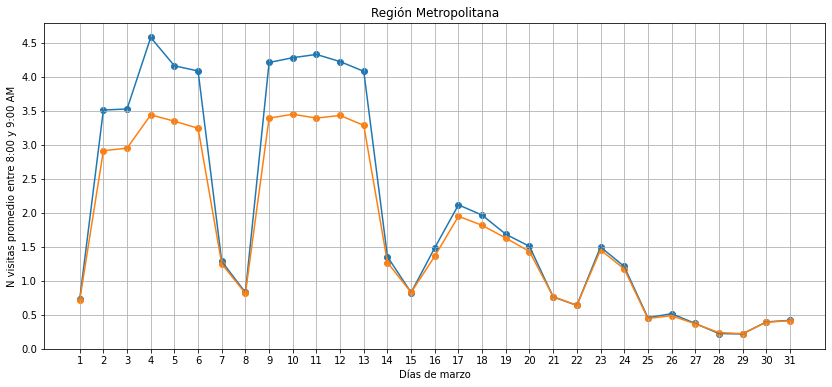

In [66]:
plt.plot(rm_gb.day,rm_gb.n_visitantes_8)
plt.scatter(rm_gb.day,rm_gb.n_visitantes_8)
plt.plot(rm_gb.day,rm_gb.n_visitantes_8_mean)
plt.scatter(rm_gb.day,rm_gb.n_visitantes_8_mean)
plt.xticks(rm_gb.day)
plt.yticks(np.arange(0,5,0.5))
plt.xlabel('Días de marzo')
plt.ylabel('N visitas promedio entre 8:00 y 9:00 AM')
plt.grid()
plt.title('Región Metropolitana')
plt.savefig('images/RM_8_marzo.png')
plt

Para todo el día

<module 'matplotlib.pyplot' from 'C:\\Users\\catta\\Anaconda3\\envs\\geopython\\lib\\site-packages\\matplotlib\\pyplot.py'>

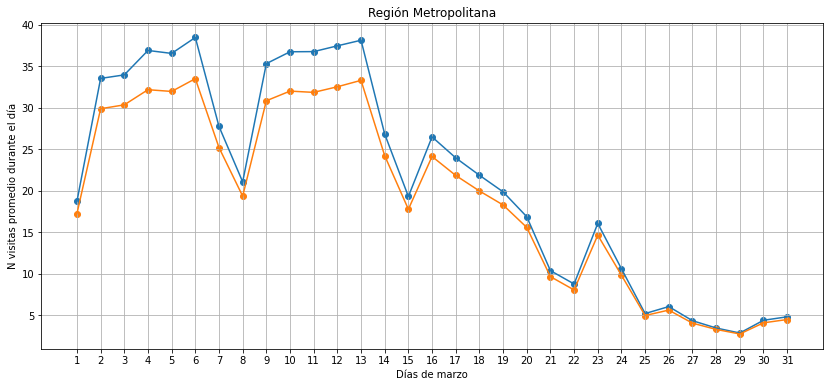

In [68]:
plt.plot(rm_gb.day,rm_gb.n_visitantes_geohash)
plt.scatter(rm_gb.day,rm_gb.n_visitantes_geohash)
plt.plot(rm_gb.day,rm_gb.n_visitantes_geohash_mean)
plt.scatter(rm_gb.day,rm_gb.n_visitantes_geohash_mean)
plt.xticks(rm_gb.day)
plt.xlabel('Días de marzo')
plt.ylabel('N visitas promedio durante el día')
plt.grid()
plt.title('Región Metropolitana')
plt.savefig('images/RM_dia_marzo.png')
plt

Entre 12 y 1

<module 'matplotlib.pyplot' from 'C:\\Users\\catta\\Anaconda3\\envs\\geopython\\lib\\site-packages\\matplotlib\\pyplot.py'>

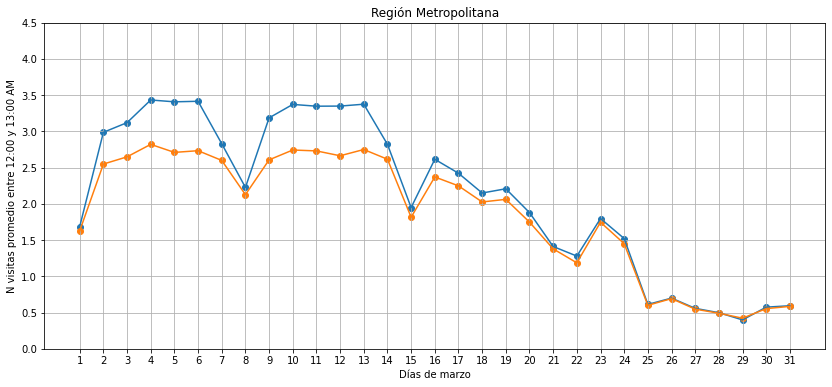

In [69]:
plt.plot(rm_gb.day,rm_gb.n_visitantes_12)
plt.scatter(rm_gb.day,rm_gb.n_visitantes_12)
plt.plot(rm_gb.day,rm_gb.n_visitantes_12_mean)
plt.scatter(rm_gb.day,rm_gb.n_visitantes_12_mean)
plt.xticks(rm_gb.day)
plt.yticks(np.arange(0,5,0.5))
plt.xlabel('Días de marzo')
plt.ylabel('N visitas promedio entre 12:00 y 13:00 AM')
plt.grid()
plt.title('Región Metropolitana')
plt.savefig('images/RM_12_marzo.png')
plt

Entre 3 y 4

<module 'matplotlib.pyplot' from 'C:\\Users\\catta\\Anaconda3\\envs\\geopython\\lib\\site-packages\\matplotlib\\pyplot.py'>

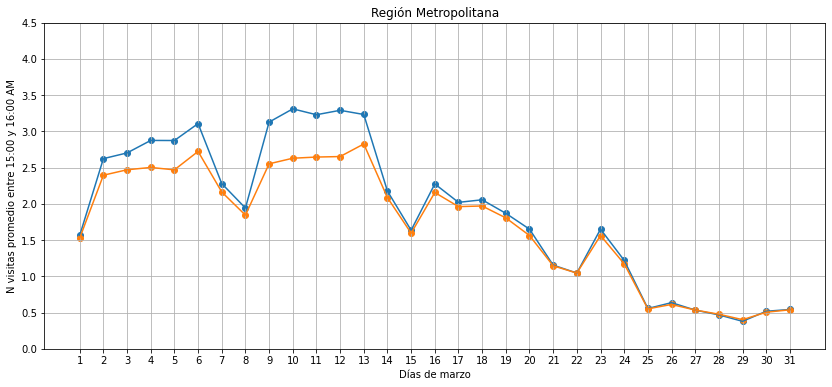

In [70]:
plt.plot(rm_gb.day,rm_gb.n_visitantes_15)
plt.scatter(rm_gb.day,rm_gb.n_visitantes_15)
plt.plot(rm_gb.day,rm_gb.n_visitantes_15_mean)
plt.scatter(rm_gb.day,rm_gb.n_visitantes_15_mean)
plt.xticks(rm_gb.day)
plt.yticks(np.arange(0,5,0.5))
plt.xlabel('Días de marzo')
plt.ylabel('N visitas promedio entre 15:00 y 16:00 AM')
plt.grid()
plt.title('Región Metropolitana')
plt.savefig('images/RM_3_marzo.png')
plt

Entre 14 y 15

<module 'matplotlib.pyplot' from 'C:\\Users\\catta\\Anaconda3\\envs\\geopython\\lib\\site-packages\\matplotlib\\pyplot.py'>

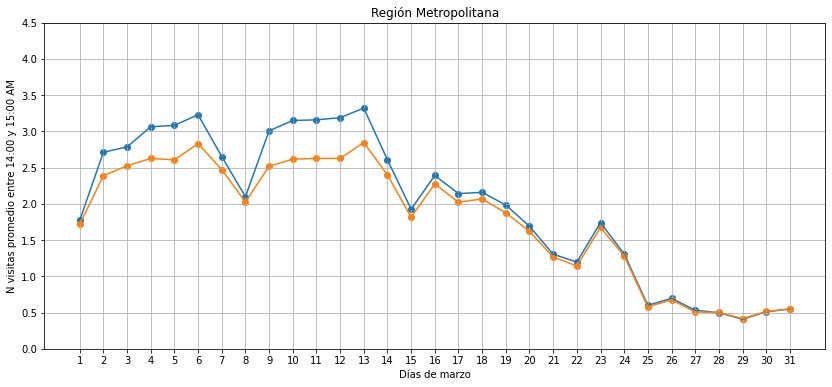

In [78]:
plt.plot(rm_gb.day,rm_gb.n_visitantes_14)
plt.scatter(rm_gb.day,rm_gb.n_visitantes_14)
plt.plot(rm_gb.day,rm_gb.n_visitantes_14_mean)
plt.scatter(rm_gb.day,rm_gb.n_visitantes_14_mean)
plt.xticks(rm_gb.day)
plt.yticks(np.arange(0,5,0.5))
plt.xlabel('Días de marzo')
plt.ylabel('N visitas promedio entre 14:00 y 15:00 AM')
plt.grid()
plt.title('Región Metropolitana')
plt.savefig('images/RM_2_marzo.png')
plt

In [53]:
df.columns

Index(['geohash', 'g_adm_1', 'g_adm_3', 'month', 'day', 'n_visitantes_geohash',
       'n_visitantes_adm3', 'n_visitantes_0', 'n_visitantes_1',
       'n_visitantes_2', 'n_visitantes_3', 'n_visitantes_4', 'n_visitantes_5',
       'n_visitantes_6', 'n_visitantes_7', 'n_visitantes_8', 'n_visitantes_9',
       'n_visitantes_10', 'n_visitantes_11', 'n_visitantes_12',
       'n_visitantes_13', 'n_visitantes_14', 'n_visitantes_15',
       'n_visitantes_16', 'n_visitantes_17', 'n_visitantes_18',
       'n_visitantes_19', 'n_visitantes_20', 'n_visitantes_21',
       'n_visitantes_22', 'n_visitantes_23'],
      dtype='object')

- marzo, abril y mayo
- x comuna 
- varias regiones que hayan abierto colegios otro día
- imputar con 0 aquellos las visitas a aquellos geohash que no registran datos
- agregar label gráfico escuela/colindante